# Multiclass Classification using TensorFlow Dataset

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
# Vizualize data
train_data[0].shape, train_data[0].shape, train_data[0], train_data[0]

((28, 28),
 (28, 28),
 array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
           0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
           1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
           0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
           0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
           0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0, 

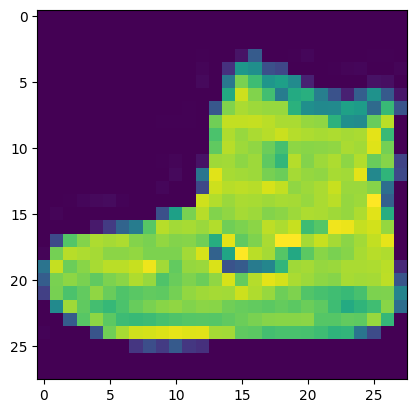

In [3]:
# Plot a sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0]);

In [4]:
# Check the sample label
train_labels[0]

9

In [5]:
# Create a list to index training labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

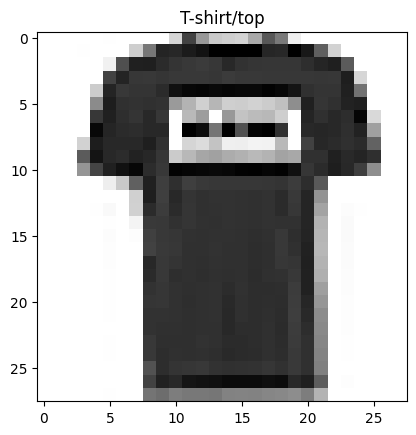

In [6]:
# Plot an example and label
index_of_choice = 1

plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

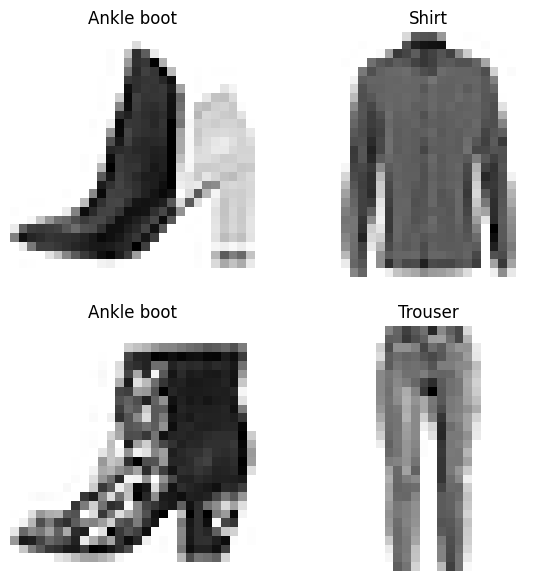

In [7]:
# Plot multiple random images
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)


## Build the model

In [8]:
# Set the seed
tf.random.set_seed(42)

# Create the Model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

# Fit the model
non_norm_history = model.fit(train_data,
                             tf.one_hot(train_labels, depth=10),
                             epochs=10,
                             validation_data=(test_data, tf.one_hot(test_labels, depth=10)))


Epoch 1/10
1875/1875 [==============================] - 22s 6ms/step - loss: 2.0845 - accuracy: 0.1706 - val_loss: 1.7950 - val_accuracy: 0.2214
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.7258 - accuracy: 0.2595 - val_loss: 1.6876 - val_accuracy: 0.2587
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6601 - accuracy: 0.2746 - val_loss: 1.6340 - val_accuracy: 0.2701
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6336 - accuracy: 0.2765 - val_loss: 1.6257 - val_accuracy: 0.2812
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.6230 - accuracy: 0.2785 - val_loss: 1.6111 - val_accuracy: 0.2822
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6104 - accuracy: 0.2796 - val_loss: 1.6008 - val_accuracy: 0.2806
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.6023 - accuracy: 0.2834 - val_loss: 1.6075 - val_accuracy

In [9]:
# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Check min and max in data
train_data.min(), train_data.max()

(0, 255)

In [11]:
# Normalizing the data
train_data_norm = train_data / train_data.max() # We can divide by the max to get values between 0 & 1
test_data_norm = test_data / test_data.max()

# Check the values
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [12]:
# Set the seed
tf.random.set_seed(42)

# Create the Model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

# Fit the model
norm_history_1 = model_1.fit(train_data_norm,
                             tf.one_hot(train_labels, depth=10),
                             epochs=10,
                             validation_data=(test_data_norm, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.3106 - accuracy: 0.5072 - val_loss: 1.0232 - val_accuracy: 0.6380
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9345 - accuracy: 0.6525 - val_loss: 0.8973 - val_accuracy: 0.6690
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8442 - accuracy: 0.6818 - val_loss: 0.8418 - val_accuracy: 0.6801
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7966 - accuracy: 0.7014 - val_loss: 0.7987 - val_accuracy: 0.7052
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7478 - accuracy: 0.7173 - val_loss: 0.7703 - val_accuracy: 0.7129
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6972 - accuracy: 0.7344 - val_loss: 0.7136 - val_accuracy: 0.7263
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6628 - accuracy: 0.7430 - val_loss: 0.6769 - val_accuracy:

<Axes: title={'center': 'Normailized data'}>

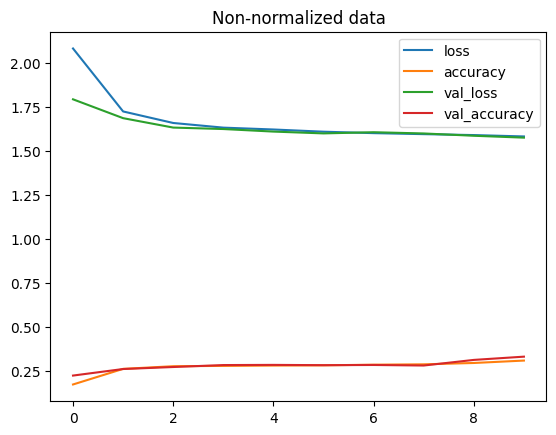

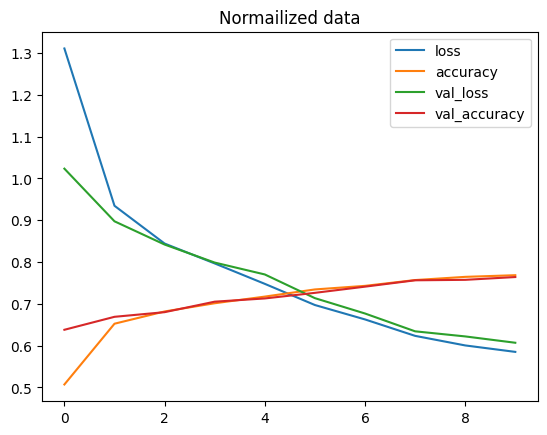

In [13]:
import pandas as pd

# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title='Non-normalized data')

# Plot normalized data loss curves
pd.DataFrame(norm_history_1.history).plot(title='Normailized data')

## Finding the ideal learning rate

In [14]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

# Compile the model
model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Create Learning Rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
history_2 = model_2.fit(train_data_norm,
                        tf.one_hot(train_labels, depth=10),
                        epochs=40,
                        validation_data=(test_data_norm,  tf.one_hot(test_labels, depth=10)),
                        callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 8s 4ms/step - loss: 1.0694 - accuracy: 0.5979 - val_loss: 0.7333 - val_accuracy: 0.7580 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6481 - accuracy: 0.7841 - val_loss: 0.6501 - val_accuracy: 0.7837 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5892 - accuracy: 0.8002 - val_loss: 0.6232 - val_accuracy: 0.7859 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5649 - accuracy: 0.8077 - val_loss: 0.5932 - val_accuracy: 0.7987 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5531 - accuracy: 0.8085 - val_loss: 0.5898 - val_accuracy: 0.7940 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5430 - accuracy: 0.8122 - val_loss: 0.6134 - val_accuracy: 0.7882 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 7s

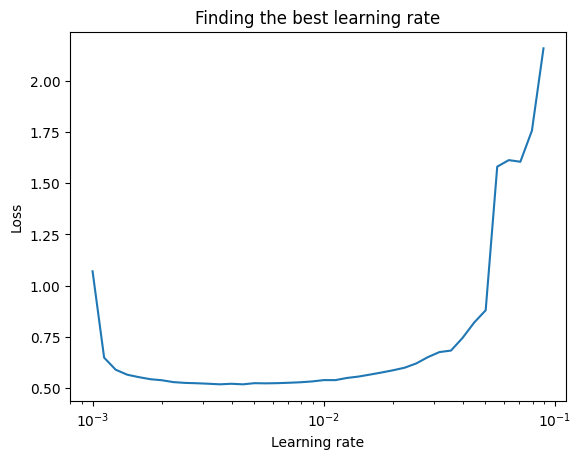

In [15]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, history_2.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Finding the best learning rate');

In [16]:
# Model with the ideal learning rate

# Set random seed
tf.random.set_seed(42)

# Create Model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile Model
model_3.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# Fit the model
history_3 = model_3.fit(train_data_norm,
                        tf.one_hot(train_labels, depth=10),
                        epochs=20,
                        validation_data=(test_data_norm,  tf.one_hot(test_labels, depth=10)))

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 1.0865 - accuracy: 0.6070 - val_loss: 0.7850 - val_accuracy: 0.7217
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6525 - accuracy: 0.7715 - val_loss: 0.6261 - val_accuracy: 0.7814
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5842 - accuracy: 0.7974 - val_loss: 0.6150 - val_accuracy: 0.7855
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5565 - accuracy: 0.8079 - val_loss: 0.5776 - val_accuracy: 0.8001
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5400 - accuracy: 0.8121 - val_loss: 0.5772 - val_accuracy: 0.7954
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5269 - accuracy: 0.8184 - val_loss: 0.5779 - val_accuracy: 0.7990
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5180 - accuracy: 0.8220 - val_loss: 0.5648 - val_accuracy:

## Evaluating the Model

In [17]:
# Create a confusion matrix
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

In [18]:
# Make preds
y_probs = model_3.predict(test_data_norm)

# View the first 5 preds
y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[4.7553156e-04, 5.7026438e-07, 8.8112091e-07, 5.0647959e-05,
        4.9581750e-08, 1.5787275e-01, 5.9446011e-05, 1.2612103e-01,
        1.2229725e-02, 7.0318943e-01],
       [3.8943102e-03, 3.1650314e-05, 9.3728691e-01, 7.2809116e-06,
        7.5709508e-03, 2.4417756e-33, 5.1208604e-02, 0.0000000e+00,
        3.4067992e-07, 9.4004198e-28],
       [2.1214246e-06, 9.9961901e-01, 3.6153270e-04, 1.2924309e-05,
        4.2251331e-06, 8.6476604e-21, 2.4164515e-07, 1.5268197e-24,
        8.6663961e-11, 2.2017600e-12],
       [7.9637557e-06, 9.9971312e-01, 7.0853639e-05, 2.0471953e-04,
        2.9640187e-06, 5.9687311e-19, 3.5792883e-07, 8.2765096e-23,
        9.1389431e-11, 2.1885488e-11],
       [1.8877763e-01, 7.2052520e-05, 3.4565657e-02, 4.6304546e-02,
        4.1204657e-02, 2.4748945e-15, 6.8754184e-01, 3.8824922e-37,
        1.5335917e-03, 1.1217605e-16]], dtype=float32)

In [19]:
# Convert pred into integers
y_preds = y_probs.argmax(axis=1)

y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[694,   7,  21,  78,   5,   1, 169,   0,  25,   0],
       [  0, 959,  13,  23,   3,   0,   0,   0,   2,   0],
       [ 12,   7, 724,   8, 170,   0,  74,   0,   5,   0],
       [ 38,  32,  14, 805,  49,   2,  54,   0,   5,   1],
       [  0,   6, 112,  25, 783,   0,  72,   0,   2,   0],
       [  1,   0,   0,   0,   0, 885,   0,  57,  19,  38],
       [106,   5, 130,  49, 150,   0, 537,   0,  22,   1],
       [  0,   0,   0,   0,   0,  30,   0, 930,   0,  40],
       [  5,   0,  11,   8,   5,   7,  41,   4, 915,   4],
       [  1,   0,   0,   0,   0,  10,   0,  42,   4, 943]])

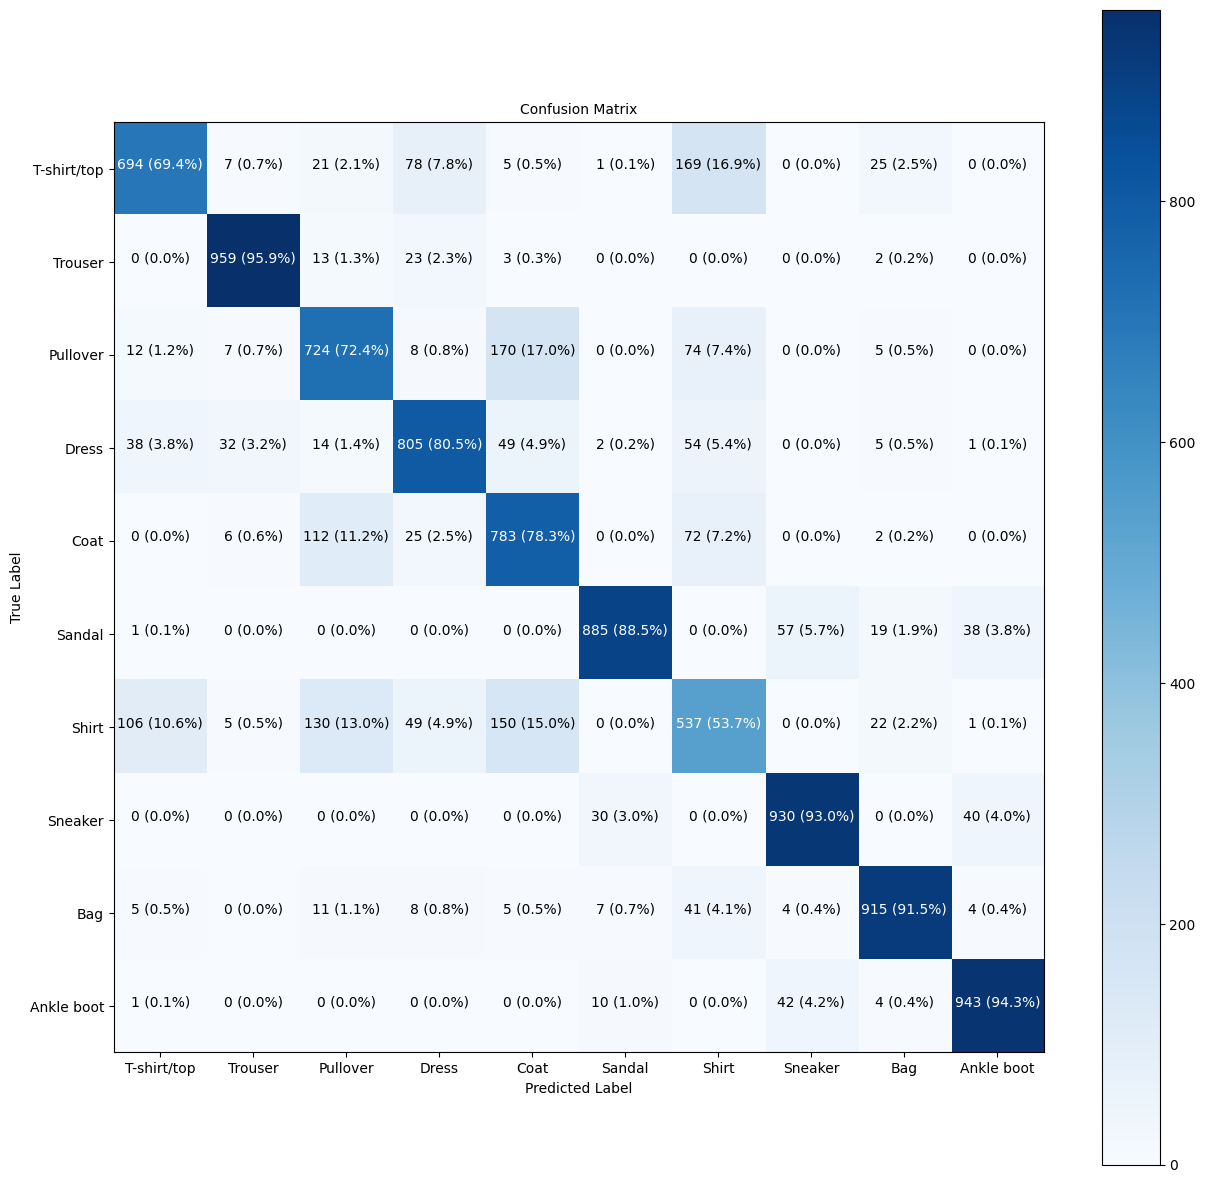

In [21]:
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [28]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Show a random image with a prediction label and the true label.
  """
  # Set up random integer
  i = random.randint(0, len(images))

  # Create predictions and target
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the title's color depending if the prediction is right
  if pred_label == true_label:
    color = 'green'
  else:
    color= 'red'

  # Add xlabel info.
  plt.xlabel(f'Pred: {pred_label} {100*tf.reduce_max(pred_probs):2.0f}% (True: {true_label})',
             color=color)

1/1 [==============================] - 0s 23ms/step


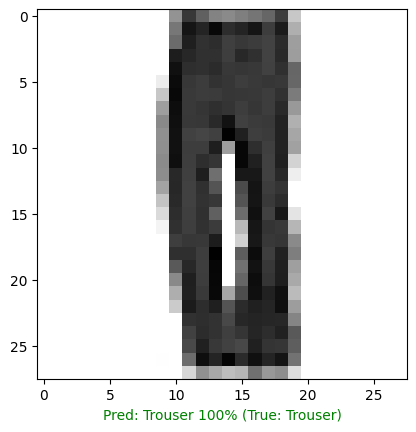

In [31]:
plot_random_image(model_3,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=class_names)

## What patterns is the model learning

In [32]:
# Find the layers of the model
model_3.layers

In [33]:
# Extract a particula layer
model_3.layers[1]

In [34]:
# Get the patterns of a layer
weights, biases = model_3.layers[1].get_weights()

weights.shape, weights

((784, 4),
 array([[-6.5350354e-01,  7.3881400e-01, -4.7546588e-02, -2.1213858e-01],
        [-9.9461091e-01,  5.7975662e-01,  7.7243274e-01,  4.2163935e-01],
        [-9.6355492e-01,  1.3111153e+00, -1.4986032e-01,  6.9644243e-02],
        ...,
        [-5.8819503e-01,  3.7882745e-02,  8.7150329e-06, -2.1430580e-01],
        [-6.7814404e-01, -3.3753388e-02, -8.8901088e-02, -1.3288291e-01],
        [ 6.9354288e-02,  4.2765570e-01, -1.1877531e+00, -5.6291759e-02]],
       dtype=float32))

In [35]:
# Bias and Biases shapes
biases.shape, biases

((4,), array([0.5734851 , 1.0345237 , 2.3835967 , 0.31617415], dtype=float32))

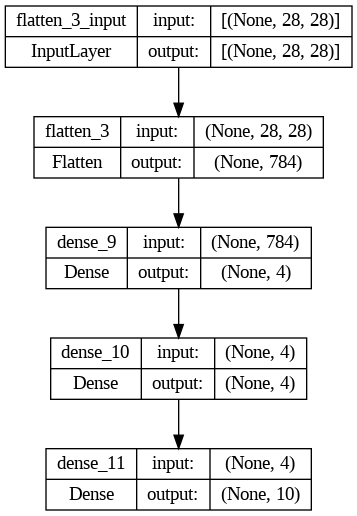

In [37]:
from tensorflow.keras.utils import plot_model

plot_model(model_3, show_shapes=True)